In [2]:
import pandas as pd # data processing, CSV file I/O (read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # for statistical data visualization

In [3]:
dataset = pd.read_csv('task_3a_sample_data.csv', delimiter='\t')

In [4]:
dataset.shape

(50, 4)

In [5]:
dataset.head()

,public_id,title,text,our rating
0,f2182a54,HUGE! Attorney Sidney Powell CONFIRMS Alleged ...,Last week Rep. Louie Gohmert told Chris Salced...,FALSE
1,c5175d8d,Paul Ryan’s Worst Ally - The New York Times,WHATEVER drama plays out when Republicans meet...,TRUE
2,392886ea,Antifa gearing up for false flag violence disg...,With merchants in Democrat-run cities boarding...,FALSE
3,bc6d5d55,Remarks by President Biden on the Administrati...,State Dining Room 4:22 P.M. EST THE PRESIDEN...,partially false
4,b8437efb,BOMBSHELL: Covid-19 infection rate may be 440%...,(Natural News) A 2012 study published in the j...,FALSE


In [6]:
col_names = dataset.columns

col_names

Index(['public_id', 'title', 'text', 'our rating'], dtype='object')

In [7]:
# check distribution of 'our rating' column

dataset['our rating'].value_counts()

FALSE              21
partially false    18
TRUE               11
Name: our rating, dtype: int64

In [8]:
# view percentage distribution of 'our rating' column

dataset['our rating'].value_counts()/np.float(len(dataset))

FALSE              0.42
partially false    0.36
TRUE               0.22
Name: our rating, dtype: float64

In [9]:
# view summary dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   public_id   50 non-null     object
 1   title       50 non-null     object
 2   text        50 non-null     object
 3   our rating  50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [10]:
# check missing values

dataset.isnull().sum()

public_id     0
title         0
text          0
our rating    0
dtype: int64

In [11]:
dataset.describe()

,public_id,title,text,our rating
count,50,50,50,50
unique,50,50,50,3
top,610801c6,Trump Is the Worst Kind of Socialist,Please Share This Story! Dr. ...,FALSE
freq,1,1,1,21


In [12]:
X = dataset.drop(columns=['our rating'])

y = dataset['our rating']

X['total'] = X['title'] + ' ' + X['text']

In [13]:
words = X.copy()

In [14]:
import nltk

from nltk.corpus import stopwords

nltk.download('stopwords')

nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rares.radu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rares.radu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
import re
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
corpus = []

for i in range(len(words)):
    review = re.sub('[^a-zA-Z]', ' ', words['total'][i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [16]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf_vec = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

# X = tfidf_vec.fit_transform(corpus).toarray()


from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus).toarray()

In [17]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [18]:
from sklearn import metrics
from sklearn.svm import SVC
svc = SVC(kernel='linear', gamma='auto')

svc.fit(X_train, y_train)

prediction = svc.predict(X_test)

In [19]:
report = metrics.classification_report(y_test, prediction, output_dict=True)

report

{'FALSE': {'precision': 0.2857142857142857,
  'recall': 1.0,
  'f1-score': 0.4444444444444445,
  'support': 2},
 'TRUE': {'precision': 1.0,
  'recall': 0.3333333333333333,
  'f1-score': 0.5,
  'support': 3},
 'partially false': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 5},
 'accuracy': 0.3,
 'macro avg': {'precision': 0.42857142857142855,
  'recall': 0.4444444444444444,
  'f1-score': 0.3148148148148148,
  'support': 10},
 'weighted avg': {'precision': 0.3571428571428571,
  'recall': 0.3,
  'f1-score': 0.23888888888888887,
  'support': 10}}

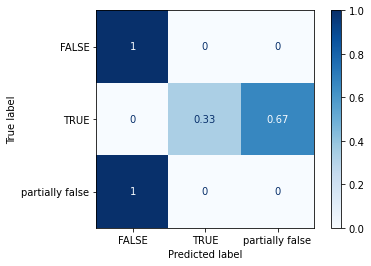

In [20]:
from sklearn.metrics import plot_confusion_matrix
cm = metrics.plot_confusion_matrix(svc, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

In [60]:
true_false_dataset = dataset[(dataset['our rating'] == 'TRUE') | (dataset['our rating'] == 'FALSE')]
true_partially_false_dataset = dataset[(dataset['our rating'] == 'TRUE') | (dataset['our rating'] == 'partially false')]
false_partially_false_dataset = dataset[(dataset['our rating'] == 'FALSE') | (dataset['our rating'] == 'partially false')]

In [61]:
X_true_false = true_false_dataset.drop(columns=['our rating'])
y_true_false = true_false_dataset['our rating']

X_true_false['total'] = X_true_false['title'] + ' ' + X_true_false['text']




X_true_partially_false = true_partially_false_dataset.drop(columns=['our rating'])
y_true_partially_false = true_partially_false_dataset['our rating']

X_true_partially_false['total'] = X_true_partially_false['title'] + ' ' + X_true_partially_false['text']




X_false_partially_false = false_partially_false_dataset.drop(columns=['our rating'])
y_false_partially_false = false_partially_false_dataset['our rating']

X_false_partially_false['total'] = X_false_partially_false['title'] + ' ' + X_false_partially_false['text']

In [62]:
words_true_false = X_true_false.copy()
words_true_partially_false = X_true_partially_false.copy()
words_false_partially_false = X_false_partially_false.copy()


In [64]:
lemmatizer = WordNetLemmatizer()
corpus_true_false = []

for i in range(50):
    if(i in words_true_false['total']):
        review_true_false = re.sub('[^a-zA-Z]', ' ', words_true_false['total'][i])
        review_true_false = review_true_false.lower()
        review_true_false = review_true_false.split()
        review_true_false = [lemmatizer.lemmatize(word) for word in review_true_false if not word in stopwords.words('english')]
        review_true_false = ' '.join(review_true_false)
        corpus_true_false.append(review_true_false)

lemmatizer = WordNetLemmatizer()
corpus_true_partially_false = []
for i in range(50):
    if(i in words_true_partially_false['total']):
        review_true_partially_false = re.sub('[^a-zA-Z]', ' ', words_true_partially_false['total'][i])
        review_true_partially_false = review_true_partially_false.lower()
        review_true_partially_false = review_true_partially_false.split()
        review_true_partially_false = [lemmatizer.lemmatize(word) for word in review_true_partially_false if not word in stopwords.words('english')]
        review_true_partially_false = ' '.join(review_true_partially_false)
        corpus_true_partially_false.append(review_true_partially_false)
        
lemmatizer = WordNetLemmatizer()
corpus_false_partially_false = []
for i in range(50):
    if(i in words_false_partially_false['total']):
        review_false_partially_false = re.sub('[^a-zA-Z]', ' ', words_false_partially_false['total'][i])
        review_false_partially_false = review_false_partially_false.lower()
        review_false_partially_false = review_false_partially_false.split()
        review_false_partially_false = [lemmatizer.lemmatize(word) for word in review_false_partially_false if not word in stopwords.words('english')]
        review_false_partially_false = ' '.join(review_false_partially_false)
        corpus_false_partially_false.append(review_false_partially_false)

In [65]:
vectorizer = CountVectorizer()

X_true_false = vectorizer.fit_transform(corpus_true_false).toarray()

vectorizer = CountVectorizer()

X_true_partially_false = vectorizer.fit_transform(corpus_true_partially_false).toarray()

vectorizer = CountVectorizer()

X_false_partially_false = vectorizer.fit_transform(corpus_false_partially_false).toarray()

In [162]:
from sklearn.model_selection import train_test_split

X_true_false_train, X_true_false_test, y_true_false_train, y_true_false_test = train_test_split(X_true_false, y_true_false, test_size = 0.2)

X_true_partially_false_train, X_true_partially_false_test, y_true_partially_false_train, y_true_partially_false_test = train_test_split(X_true_partially_false, y_true_partially_false, test_size = 0.2)

X_false_partially_false_train, X_false_partially_false_test, y_false_partially_false_train, y_false_partially_false_test = train_test_split(X_false_partially_false, y_false_partially_false, test_size = 0.2)

In [163]:
from sklearn import metrics
from sklearn.svm import SVC
svc_true_false = SVC(gamma='auto', C=100.0)
svc_true_partially_false = SVC(kernel='sigmoid', C=100.0, gamma='auto')
svc_false_partially_false = SVC(kernel='linear', C=100.0, gamma='auto')

# svc = SVC(kernel='linear', C=10000.0, gamma='auto')

svc_true_false.fit(X_true_false_train, y_true_false_train)
svc_true_partially_false.fit(X_true_partially_false_train, y_true_partially_false_train)
svc_false_partially_false.fit(X_false_partially_false_train, y_false_partially_false_train)

prediction_true_false = svc_true_false.predict(X_true_false_test)
prediction_true_partially_false = svc_true_partially_false.predict(X_true_partially_false_test)
prediction_false_partially_false = svc_false_partially_false.predict(X_false_partially_false_test)

In [164]:
report_true_false = metrics.classification_report(y_true_false_test, prediction_true_false, output_dict=True)

report_true_false

{'FALSE': {'precision': 0.8333333333333334,
  'recall': 1.0,
  'f1-score': 0.9090909090909091,
  'support': 5},
 'TRUE': {'precision': 1.0,
  'recall': 0.5,
  'f1-score': 0.6666666666666666,
  'support': 2},
 'accuracy': 0.8571428571428571,
 'macro avg': {'precision': 0.9166666666666667,
  'recall': 0.75,
  'f1-score': 0.7878787878787878,
  'support': 7},
 'weighted avg': {'precision': 0.880952380952381,
  'recall': 0.8571428571428571,
  'f1-score': 0.8398268398268397,
  'support': 7}}

In [165]:
report_true_partially_false = metrics.classification_report(y_true_partially_false_test, prediction_true_partially_false, output_dict=True)

report_true_partially_false

{'TRUE': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1},
 'partially false': {'precision': 0.8,
  'recall': 0.8,
  'f1-score': 0.8000000000000002,
  'support': 5},
 'accuracy': 0.6666666666666666,
 'macro avg': {'precision': 0.4,
  'recall': 0.4,
  'f1-score': 0.4000000000000001,
  'support': 6},
 'weighted avg': {'precision': 0.6666666666666666,
  'recall': 0.6666666666666666,
  'f1-score': 0.6666666666666669,
  'support': 6}}

In [166]:
report_false_partially_false = metrics.classification_report(y_false_partially_false_test, prediction_false_partially_false, output_dict=True)

report_false_partially_false

{'FALSE': {'precision': 0.3333333333333333,
  'recall': 1.0,
  'f1-score': 0.5,
  'support': 2},
 'partially false': {'precision': 1.0,
  'recall': 0.3333333333333333,
  'f1-score': 0.5,
  'support': 6},
 'accuracy': 0.5,
 'macro avg': {'precision': 0.6666666666666666,
  'recall': 0.6666666666666666,
  'f1-score': 0.5,
  'support': 8},
 'weighted avg': {'precision': 0.8333333333333334,
  'recall': 0.5,
  'f1-score': 0.5,
  'support': 8}}

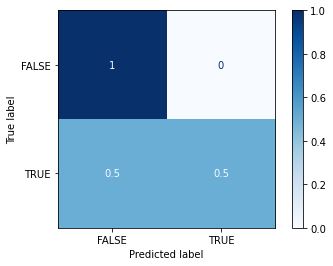

In [167]:
from sklearn.metrics import plot_confusion_matrix
cm = metrics.plot_confusion_matrix(svc_true_false, X_true_false_test, y_true_false_test, cmap=plt.cm.Blues, normalize='true')


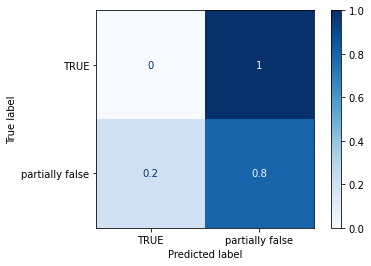

In [168]:
cm = metrics.plot_confusion_matrix(svc_true_partially_false, X_true_partially_false_test, y_true_partially_false_test, cmap=plt.cm.Blues, normalize='true')

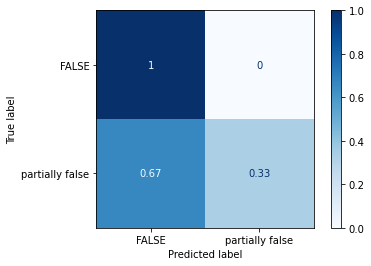

In [169]:
cm = metrics.plot_confusion_matrix(svc_false_partially_false, X_false_partially_false_test, y_false_partially_false_test, cmap=plt.cm.Blues, normalize='true')